<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyVIRUS</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>Virus</b> modelling</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyVIRUS.png"></td>
</tr>
</table>

----
# `pyVIRUS`

pyVIRUS, a program package for for modelling the spread and containment of a virus in a population.

# Solving differential equations

In this notebook, we want to introduce simple numerical integration as a tool to solve differential 
equations. We focus on a **single ordinary differential equation of first order**. We come back
to what this means in a minute.

First, we initialise `python`by importing the `numpy`library, the `odeint` module from the `scipy`
library, and of course `matplotlib` to plot figures.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

## Defining functions

We now consider a function $f(t)$, it might be a time series of any kind. The variable $t$, our
time, should be given on a defined interval, $t \in [t_1,t_2]$, with $t_1$ and $t_2$ the start and
end time, and the units any chosen time unit.

Let's start with a polynomial, a *quadratic equation*:
$$
f_1(t) = t^2, \quad t \in [0,20] 
$$

We create the time interval with `linspace` from numpy, which gives us an array, in this case 21 elements long,
within the range $[t_1,t_2]$.

Then, we define the "function" as $y1$. Note that python *knows* $y1$ will be an array,
because the used variable $t$ is already an array!

Then we plot function $f_1$. The function **increases** fast.

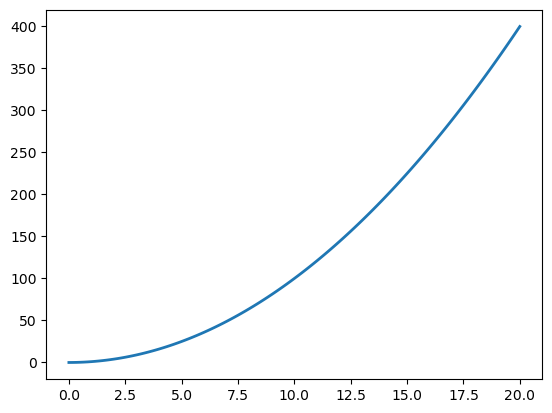

In [2]:
t  = np.linspace(0,20,121)
def f1(t):
    y = t**2
    return y
plt.plot(t,f1(t),lw=2)

Next, we want to define a function $f_2$, which **decreases** with time. We use the exponential function for this:
$$
f_2(t) = e^{-a t}, \quad t \in [0,20]
$$
To define this function, we cann `exp` from the numpa package, then we plot the function $f_2$.

This function decreases fast from 1 to 0, and the steepness of the decrease is controlled by 
the coefficient $a$ (which, of course, has to be positive, when the function should decrease, test it!).

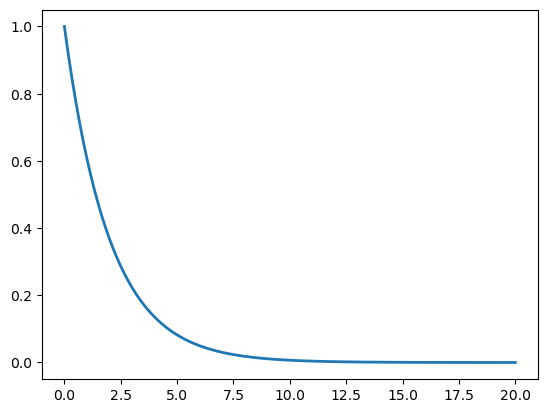

In [3]:
a = 0.5
def f2(t,a=0.5):
    y = np.exp(-a*t)
    return y
plt.plot(t,f2(t),lw=2)

Now we combine the increasing function $f_1$ and the decreasing function $f_2$ by multiplying them:
$$
f_3(t) = t^2 e^{-a t}
$$
Lets plot this function $f_3$, too.

As we expected, we have created a **non-monotonic** function, which can describe a process, e.g.,
the proportion of an intermediate decay product in a decay series (e.g. the U-Th series),
or a tracer concentration as a function of time.

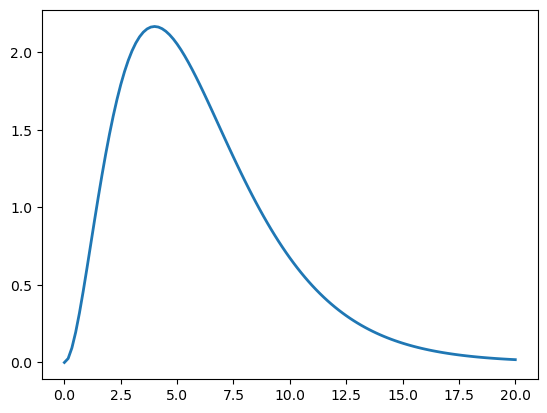

In [4]:
def f3(t,a=0.5):
    y = t**2 * np.exp(-a*t)
    return y
plt.plot(t,f3(t),lw=2)

## Creating the derivative

We now want to calculate the first derivative of function $f_3$ with respect to the variable $t$.
We need to apply the *chain rule for differentiation* (check this somewhere, if it sounds not familiar for you):
$$
{{df_3} \over {dt}} 
= {{d} \over {dt}} \left( t^2 e^{-a t} \right)
= 2 t e^{-a t} - a t^2 e^{-a t} 
= t e^{-a t} \left( 2 - a t \right)
$$
This is our **ordinary differential equation of first order**. Why?

- The function describes the **first derivative** with respect to variable $t$

- We just have **one** variable, $t$.

- It is a **single** function.

Often, this sort of equation is abbreviated as **ODE** (ordinary differential equation).

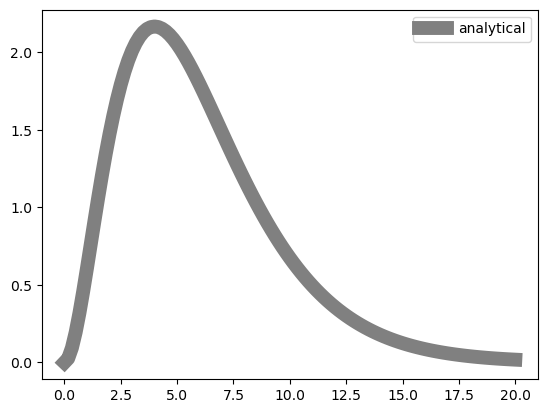

In [5]:
# plot  analytical solution
plt.plot(t,f3(t,a),linewidth='10',color='gray',label='analytical')
plt.legend()

## Solving an ODE

Often, we have to deal with this sort of eqautions (ODE's) and want to know a "solution", that is 
a times series, which results in this first derivative we know.

There are various ways to solve such a problem (see lecture **Numerical methods in Geosciences** for
more details).

In a nutshell, it boils down to

- Know the derivative (the right-hight side of ${{df_3} \over {dt}}$).

- Know a starting condition.

- plug it into the `odeint` routine of the integration package of `scipy`.

Note that the defined function `rhs` is strictly defined, because it needs to be understood by `odeint`:
We hand down $y$ (as initial condition), the variable $t$ (as array), and possible additional
parameter values (as our $a$) via the `args=()` keyword.

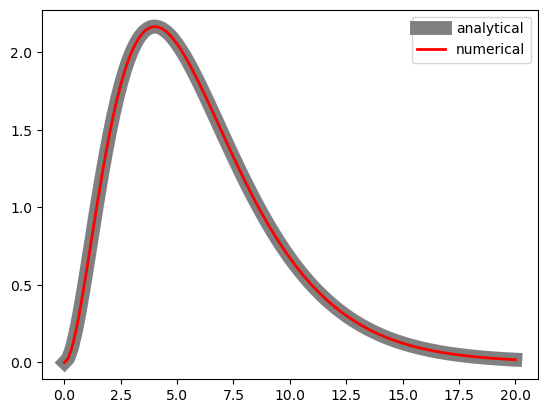

In [6]:
# define the right-hand side
def rhs(t,y,args=(a)):
    dydt = t * np.exp(-a*t) * (2.-a*t)
    return dydt

# define the initial condition
y0 = [0]

# solve the ODE for the given range
#solution = integrate.odeint(rhs, y0, t)
solution = integrate.solve_ivp(rhs, [t[0],t[-1]], y0, t_eval=t)

# plot the result, and compare it to our analytical solution
plt.plot(t,f3(t,a),linewidth='10',color='gray',label='analytical')
plt.plot(t,solution.y[0],linewidth='2',color=(1,0,0),label='numerical')
plt.legend()

Because we **know** the solution in this case (thick grey line), we can compare the **numerical** solution
(red line) and the **analytical** solution. And they match!

## Exercises

1. Start playing with the parameters $t_1$, $t_2$, but also the discretisation points (set to 21 above).

2. Define your own functions, calculate the analytical derivative, and test.

3. Use $f_1(t)=\sin(t)$ and $f_2(t)=e^{-a t}$ as functions.

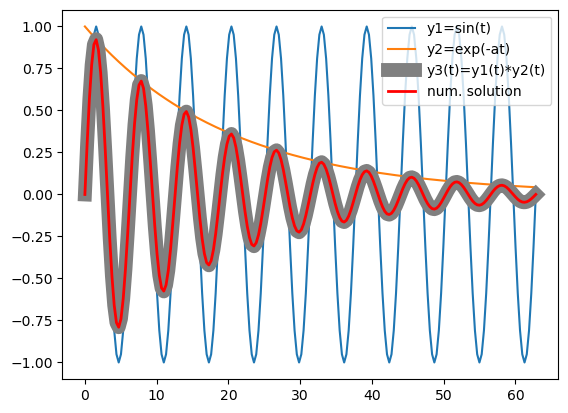

In [11]:
a  = 0.05
t  = np.linspace(0,20*np.pi,201)
y1 = np.sin(t)
y2 = np.exp(-a*t)
y3 = y1*y2
plt.plot(t,y1,label='y1=sin(t)')
plt.plot(t,y2,label='y2=exp(-at)')
plt.plot(t,y3,linewidth='10',color='gray',label='y3(t)=y1(t)*y2(t)')

def rhs(t,y,args=(a)):
    dfdt = np.exp(-a*t) * (np.cos(t)-a*np.sin(t))
    return dfdt

y0 = [0]
solution = integrate.solve_ivp(rhs, [t[0],t[-1]], y0, t_eval=t)
plt.plot(t,solution.y[0],linewidth='2',color=(1,0,0),label='num. solution')
plt.legend()